# Using Decision Trees and SVM to determine whether a patient's symptoms indicate Hypothyroidism

## Defining the Question

### a) Problem Statement

Can we determine whether a patients suffers from hypothyroidism from the exhibited symptoms?

### b) Success Metrics
Identifying a model with over 90% prediction success


### c) Understanding the context 

A hospital conducting a clinical camp as a community service effort wishes to reduce the amount of time spent in diagnosing a patient as to be suffering from hypothyroidism. The hospital therefore focusses on **building a model that would assist in classifying a case as hypothyroidic from the symptoms taken on a patient**

### d) Recording the Experimental Design

* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Build a classification model using the following Decision Tree techniques:
      1. Random forest
      2. Ada boosted trees
      3. Gradient boosted trees

* Build a classification model using SVM employing the following functions in building it:
      1. Polynomial
      2. Linear
      3. rbf
* Tune the parameters
* Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

The data provided contains information on the most common symptoms observed for hypothyroidism.



## Reading the Data and Loading Dependencies

In [1]:
# DEPENDENCIES

# Standard libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Loading data
data = pd.read_csv('/content/hypothyroid.csv')

## Checking the Data

In [3]:
# No of records in our dataset
data.shape

(3163, 26)

In [4]:
# Previewing the data
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

* There are measures that are numerical in nature but have been captured as type object. These should be converted to type numeric.
* These columns include **age, TSH, T3, TT4, T4U, FTI** and **TBG**

In [6]:
# Inspecting the nature of data elements in each column
data.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


* There are entries with **?** as the value, these need to be converted to NaN first

In [7]:
# Replacing the ? values
data = data.replace('?',np.NaN)

# Inspecting the elements once more
data.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,2717,3090,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,2695,3163,2468,3163,2914,3163,2915,3163,2916,3163,260
unique,2,92,2,2,2,2,2,2,2,2,2,2,2,2,2,239,2,69,2,268,2,158,2,280,2,52
top,negative,60,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.60,y,98,y,0.98,y,98,n,28
freq,3012,64,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,141,2914,50,2915,86,2916,55,2903,14


In [8]:
# Converting the above columns to type numeric
data.age = pd.to_numeric(data.age)
data.TSH = pd.to_numeric(data.TSH)
data.T3 = pd.to_numeric(data.T3)
data.TT4 = pd.to_numeric(data.TT4)
data.T4U = pd.to_numeric(data.T4U)
data.FTI = pd.to_numeric(data.FTI)
data.TBG = pd.to_numeric(data.TBG)

In [9]:
# Checking the data types once more
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [10]:
# Checking for null values
data.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

* The following columns have NaN entries (missing values) **age, sex, TSH, T3, TT4, T4U, FTI** and **TBG**

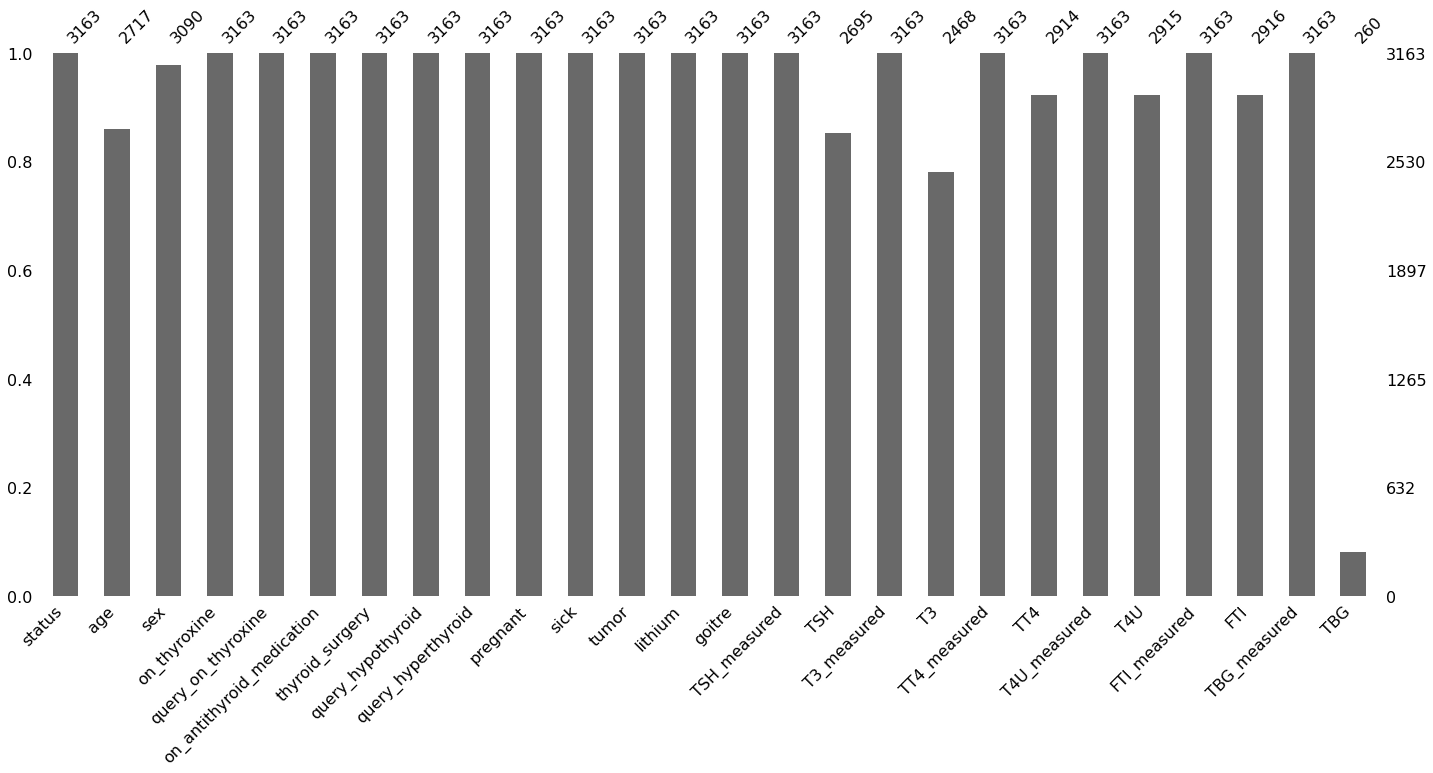

In [11]:
# Visualising the missing data
msno.bar(data)

* TBG column has the most missing data and so it can be dropped alongside its counterpart column TBG_measured

In [12]:
# Dropping the two above columns
data = data.drop(['TBG_measured', 'TBG'], axis=1)

In [13]:
# Checking for null values once more
data.isna().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64

In [14]:
# Making a copy of the data
x = data.copy()

In [15]:
# Dropping all the NAs from the copy of the data to determine the impact
x = x.dropna()

In [16]:
# Impact assessment

impact = (1 - len(x)/len(data))
'{:.2%}'.format(impact)

'36.77%'

* Dropping all the NA values implies **loss of 36.77% of the data** which is enormous
* Calculated handling of the missing values would be the most appropriate way to deal with the missing values.
* For our machine learning processes we will however use the data without the missing values

## **Exploratory Data Analysis**

Status

In [17]:
data.status.value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

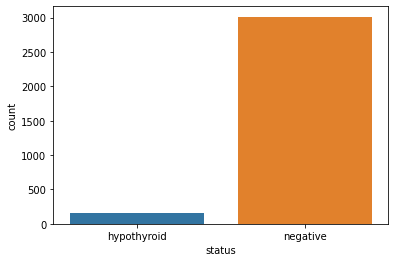

In [18]:
sns.countplot(x ='status', data = data)

In [19]:
proportion = len(data[data['status'] == 'hypothyroid']['status'])/len(data.status)
'{:.2%}'.format(proportion)

'4.77%'

* 4.77% of the population under consideration has hypothyroidism

Age

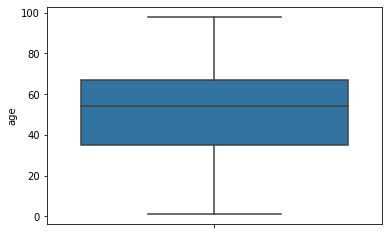

In [20]:
# Visualizing the distribution of age
sns.boxplot( y = data["age"])

* There are no outliers in the age data

**On_thyroxine**

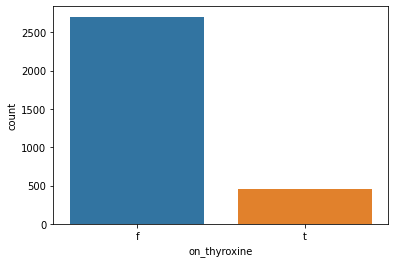

In [21]:
# Visualizing those on thyroxine
sns.countplot(x ='on_thyroxine', data = data)

In [22]:
data.on_thyroxine.value_counts()

f    2702
t     461
Name: on_thyroxine, dtype: int64

* 461 individuals are on thyroxine

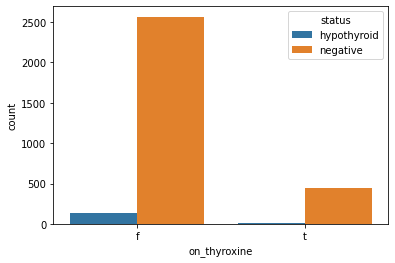

In [23]:
# Visualization of on_thyroxine relative to the status
sns.countplot(x ='on_thyroxine', hue='status', data = data)

* Most of those who are NOT on thyroxine are the ones with hypothyroidism

**query_on_thyroxine**

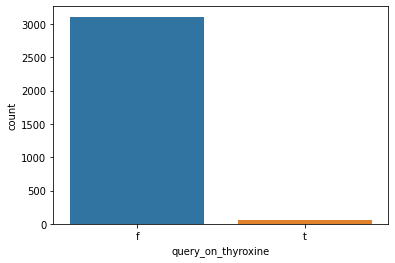

In [24]:
# Visualizing query_on_thyroxine
sns.countplot(x ='query_on_thyroxine', data = data)

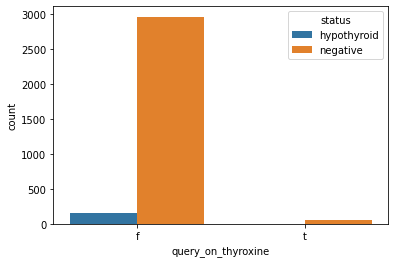

In [25]:
# Visualization of query_on_thyroxine relative to the status
sns.countplot(x ='query_on_thyroxine', hue='status', data = data)

* Of those whose query_on_thyroxine is true almost NONE has hypothyroidism

**on_antithyroid_medication**

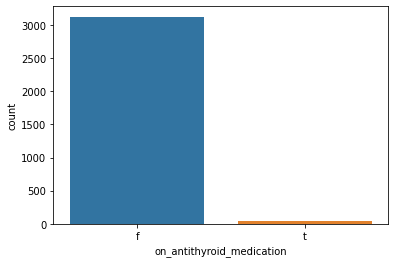

In [26]:
# Visualizing on_antithyroid_medication
sns.countplot(x ='on_antithyroid_medication', data = data)

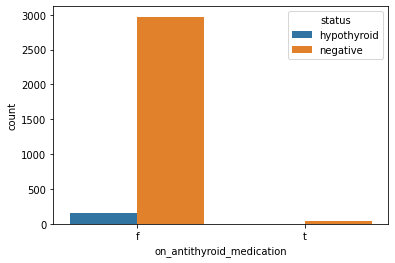

In [27]:
# Visualization of on_antithyroid_medication relative to the status
sns.countplot(x ='on_antithyroid_medication', hue='status', data = data)

* Those who are not on antithyroid medication are the ones with hypothyroid

**thyroid_surgery**

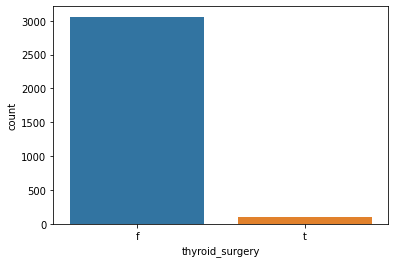

In [28]:
# Visualizing thyroid_surgery
sns.countplot(x ='thyroid_surgery', data = data)

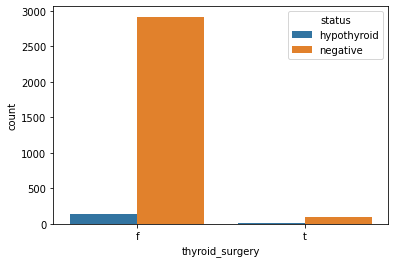

In [29]:
# Visualization of on_antithyroid_medication relative to the status
sns.countplot(x ='thyroid_surgery', hue='status', data = data)

* Hypothyroidism is observed more in the part of population that have not undertaken a sugery

**query_hypothyroid**

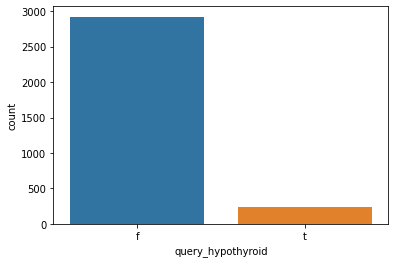

In [30]:
# Visualizing query_hypothyroid
sns.countplot(x ='query_hypothyroid', data = data)

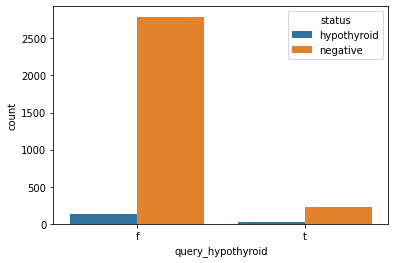

In [31]:
# Visualization of query_hypothyroid relative to the status
sns.countplot(x ='query_hypothyroid', hue='status', data = data)

* High rate of hypothyroid was observed among those whose hypothyroid query was false

**query_hyperthyroid**

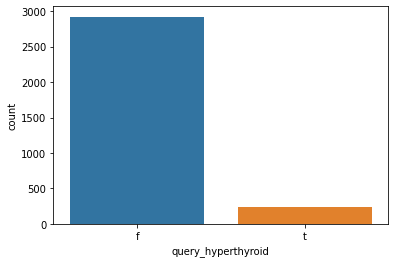

In [32]:
# Visualizing query_hyperthyroid
sns.countplot(x ='query_hyperthyroid', data = data)

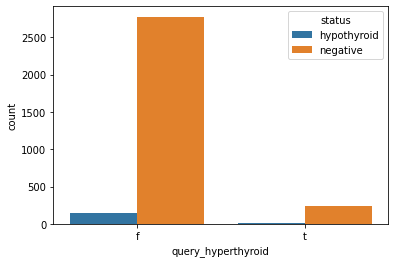

In [33]:
# Visualization of query_hyperthyroid relative to the status
sns.countplot(x ='query_hyperthyroid', hue='status', data = data)

* More hypothyroid number was observed among those whose hyperthyroid query was false

**pregnant**

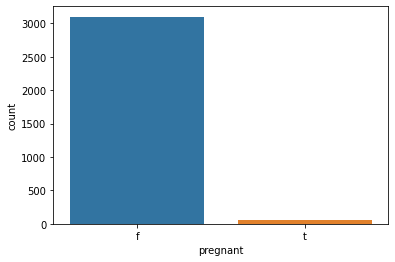

In [34]:
# Visualizing pregnant
sns.countplot(x ='pregnant', data = data)

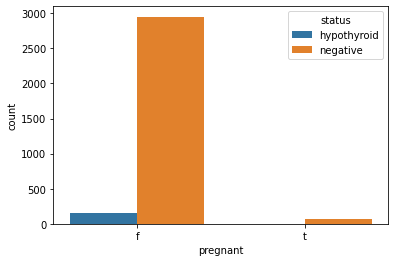

In [35]:
# Visualization of pregnant relative to the status
sns.countplot(x ='pregnant', hue='status', data = data)

* Almost no case of hypothyroidism was observed among those who were pregnant

**sick**

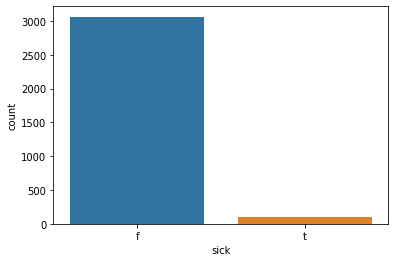

In [36]:
# Visualizing sick
sns.countplot(x ='sick', data = data)

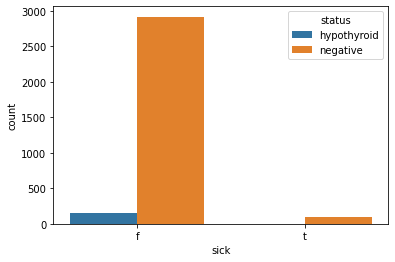

In [37]:
# Visualization of query_hyperthyroid relative to the status
sns.countplot(x ='sick', hue='status', data = data)

* Almost no case of hypothyroidism was observed among the sick

**tumor**

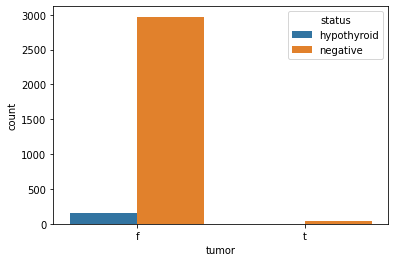

In [38]:
# Visualization of tumor relative to the status
sns.countplot(x ='tumor', hue='status', data = data)

* Almost none of those who had tumor had hypothyroidism

**lithium**

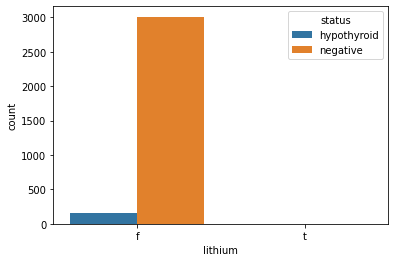

In [39]:
# Visualization of lithium relative to the status
sns.countplot(x ='lithium', hue='status', data = data)

* None of those whose lithium entry was true had hypothyroidism

**goitre**

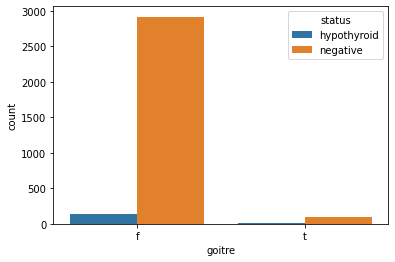

In [40]:
# Visualization of goitre relative to the status
sns.countplot(x ='goitre', hue='status', data = data)

**TSH**

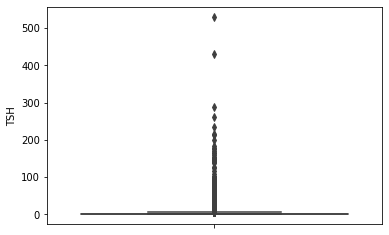

In [41]:
# Visualizing the distribution of TSH
sns.boxplot( y = data["TSH"])

**T3**

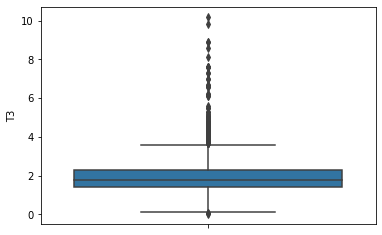

In [42]:
# Visualizing the distribution of T3
sns.boxplot( y = data["T3"])

**TT4**

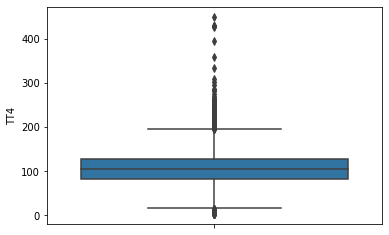

In [43]:
# Visualizing the distribution of TT4
sns.boxplot( y = data["TT4"])

**T4U**

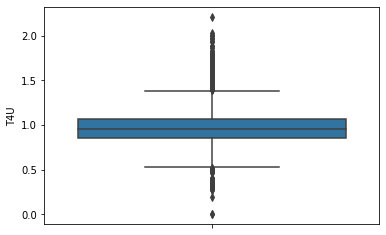

In [44]:
# Visualizing the distribution of T4U
sns.boxplot( y = data["T4U"])

**FTI**

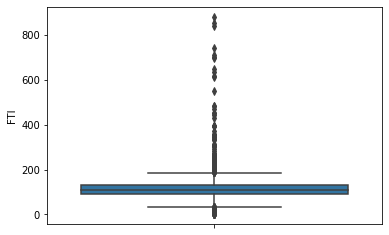

In [45]:
# Visualizing the distribution of FTI
sns.boxplot( y = data["FTI"])

* The above numerical entries indicates the presence of outliers except for the 'age' column

## Preprocessing

In [46]:
# Label encoder
label_encoder = preprocessing.LabelEncoder()

x['sex'] = x['sex'].replace('F',0).replace('M',1)

cols = [
          'on_thyroxine', 'query_on_thyroxine',
          'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
          'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
          'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured'
       ]
for col in cols:
  x[col] = label_encoder.fit_transform(x[col])

In [47]:
x.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


## Building the Models

### DECISION TREE

In [48]:
# Label
y = x['status'].values

test_features = x.columns.to_list()
test_features.remove('status')

# Features
X = x[test_features].values

In [49]:
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Random Forest

In [50]:
# Create a Gaussian Classifier
tree = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
tree.fit(X_train,y_train)

y_pred_rf = tree.predict(X_test)

In [51]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9816666666666667


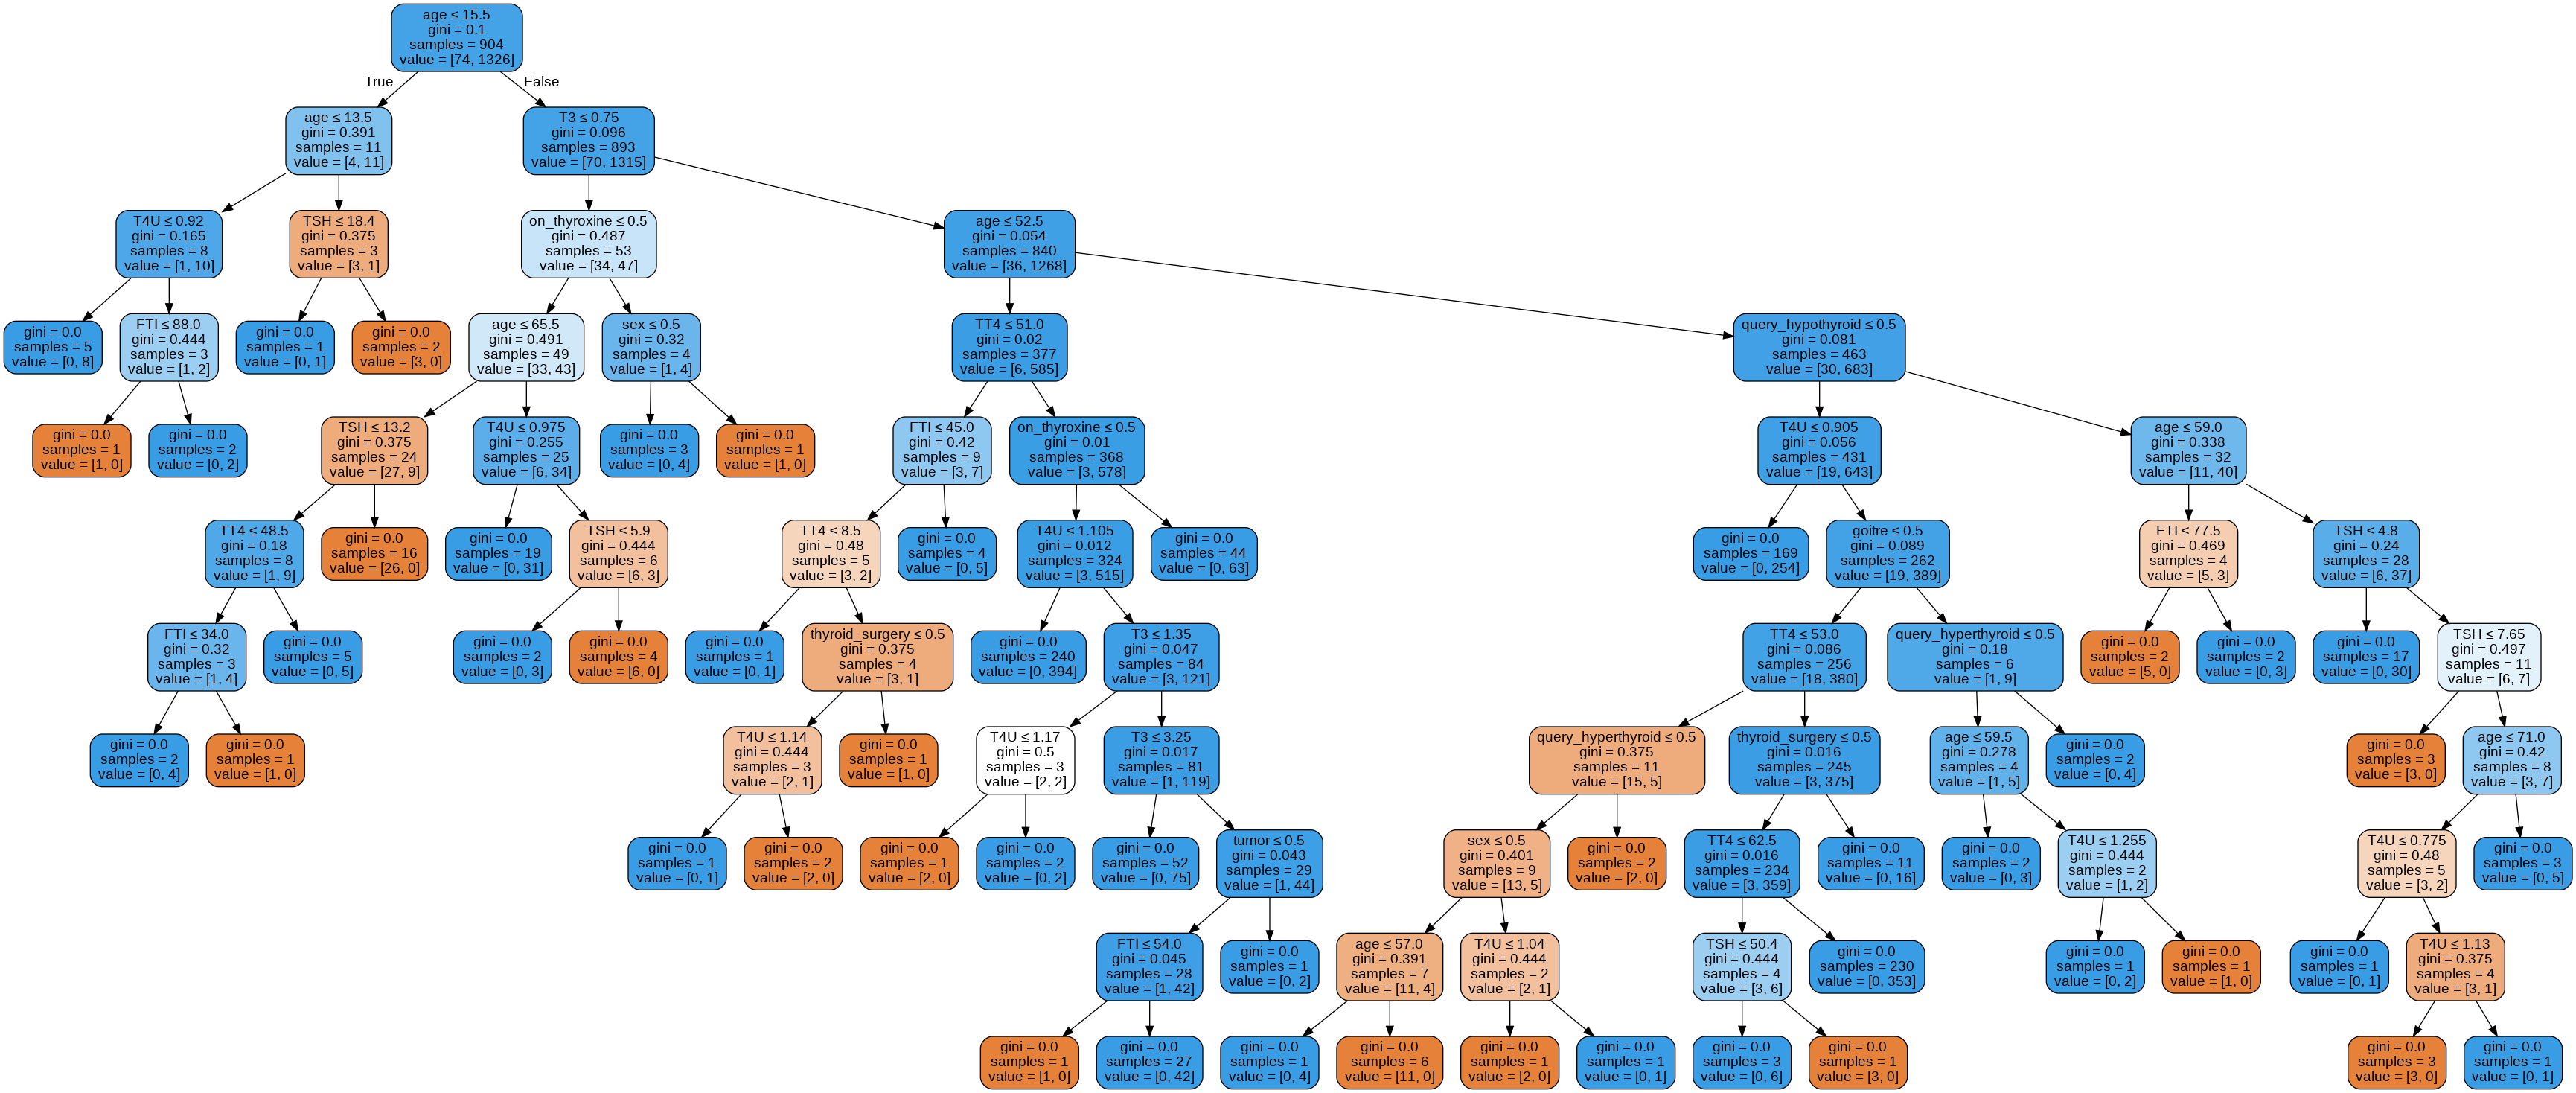

In [52]:
# Visualizing the tree

dot_data = StringIO()

# picking a specific tree from the forest
tree = tree.estimators_[40]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('viz_forest.png')
Image(graph.create_png())


<BarContainer object of 23 artists>

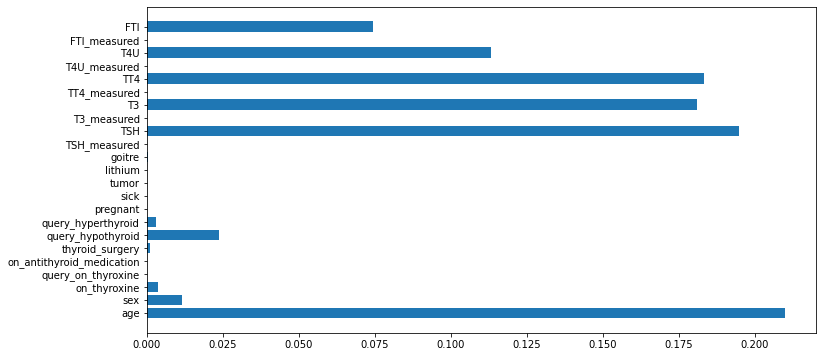

In [53]:
# Feature importance
plt.figure(figsize=[12,6])
plt.barh(test_features, tree.feature_importances_)


* Most of the features are not useful in this analysis
* The most impactful once include FTI, T4U, TT4, T3, TSH, goitre, sick, query_hypothyroidism, on_antithyroid_medication and age.
* The once of most significance relevance in order are FTI, TSH, T4U and Age respectively

AdaBoosted Decision Tree

In [54]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_ada = model.predict(X_test)

In [55]:
# Model Performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.9866666666666667


Gradient Boosted Decision Tree

In [56]:
# A set of various Learning rates
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print('')

Learning rate:  0.05
Accuracy score (training): 0.954
Accuracy score (validation): 0.958

Learning rate:  0.1
Accuracy score (training): 0.981
Accuracy score (validation): 0.977

Learning rate:  0.25
Accuracy score (training): 0.987
Accuracy score (validation): 0.983

Learning rate:  0.5
Accuracy score (training): 0.988
Accuracy score (validation): 0.983

Learning rate:  0.75
Accuracy score (training): 0.989
Accuracy score (validation): 0.983

Learning rate:  1
Accuracy score (training): 0.944
Accuracy score (validation): 0.937



* Of the three techniques under Decision Trees (random forest, adaboosted trees and gradient boosted trees) **gradient boosted decision tree** performs best at a learning rate of **0.75**

### SUPPORT VECTOR MACHINE

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Kernel: Polynomial

In [59]:
poly_svm = SVC(kernel='poly', degree=3)

poly_svm.fit(X_train, y_train)

# Making prediction
y_pred_poly = poly_svm.predict(X_test)

In [61]:
# Evaluating the model
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_poly))

[[ 24  14]
 [  3 559]]
              precision    recall  f1-score   support

 hypothyroid       0.89      0.63      0.74        38
    negative       0.98      0.99      0.99       562

    accuracy                           0.97       600
   macro avg       0.93      0.81      0.86       600
weighted avg       0.97      0.97      0.97       600

Accuracy: 0.9716666666666667


kernel: rbf

In [63]:
rbf_svm = SVC(kernel='rbf', degree=3)

rbf_svm.fit(X_train, y_train)

# Making prediction
y_pred_rbf = rbf_svm.predict(X_test)

In [64]:
# Evaluating the model
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

[[ 32   6]
 [  4 558]]
              precision    recall  f1-score   support

 hypothyroid       0.89      0.84      0.86        38
    negative       0.99      0.99      0.99       562

    accuracy                           0.98       600
   macro avg       0.94      0.92      0.93       600
weighted avg       0.98      0.98      0.98       600

Accuracy: 0.9833333333333333


kernel: sigmoid

In [80]:
sig_svm = SVC(kernel='sigmoid')

sig_svm.fit(X_train, y_train)

# Making prediction
y_sig_svm = sig_svm.predict(X_test)

In [81]:
# Evaluating the model
print(confusion_matrix(y_test, y_sig_svm))
print(classification_report(y_test, y_sig_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_sig_svm))

[[ 22  16]
 [ 23 539]]
              precision    recall  f1-score   support

 hypothyroid       0.49      0.58      0.53        38
    negative       0.97      0.96      0.97       562

    accuracy                           0.94       600
   macro avg       0.73      0.77      0.75       600
weighted avg       0.94      0.94      0.94       600

Accuracy: 0.935


* The **Radial Basis Function** is the best kernel to use

Using the top 8 important features from Decision Trees

In [70]:
x.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


In [71]:
x.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [72]:
# Top eight features
top = ['FTI','T4U','TT4','T3','TSH','age','query_hypothyroid','sex']

# New data_frame
new_x = x[top]

In [73]:
# Split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(new_x, y, test_size = 0.20)

Polynomial Kernel 2

In [74]:
# Polynomial Kernel

poly_svm_2 = SVC(kernel='poly', degree=3)

poly_svm_2.fit(X_train_2, y_train_2)

# Making prediction
y_pred_poly_2 = poly_svm_2.predict(X_test_2)

# Accuracy estimation
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_poly_2))

Accuracy: 0.975


rbf kernel 2

In [75]:
rbf_svm_2 = SVC(kernel='rbf', degree=3)

rbf_svm_2.fit(X_train_2, y_train_2)

# Making prediction
y_pred_rbf_2 = rbf_svm_2.predict(X_test_2)

# Accuracy estimation
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_rbf_2))

Accuracy: 0.9775


sigmoid kernel 2

In [83]:
sig_svm_2 = SVC(kernel='sigmoid')

sig_svm_2.fit(X_train_2, y_train_2)

# Making prediction
y_sig_svm_2 = sig_svm_2.predict(X_test_2)

# Accuracy estimation
print("Accuracy:",metrics.accuracy_score(y_test_2, y_sig_svm_2))

Accuracy: 0.925


* Using the top eight features, the **radial basis function** performs based

**Overall Observations**

* Decision trees performed better than Support Vector Machine
* The following features ranked high in terms of feature importance: FTI, T4U, TT4, T3 and TSH
* SPecifically, **gradient boosted** decision trees performed the best